## Customer Transaction Prediction

이 프로젝트의 목표는 고객들의 히스토리 데이터를 분석하여, 고객의 거래 된 금액에 관계없이, 향후 어떤 고객이 특정 거래를 할 것인지 파악할 수 있도록 하는것이 목표입니다. `target`이 0이면 거래를 할 수 없다는 것을 의미하고, 1이면 거래를 할 수 있다는 것을 의미합니다.

 - Target의 분포를 살펴보면 0과 1의 비율이 맞지 않습니다. 즉 imbalance 데이터 입니다. 이런 데이터를 다루는 기법중의 하나는 두 데이터의 크기를 1:1로 맞추는 것입니다. 두 카테고리의 데이터 수가 맞도록 샘플링 하세요.
 - 우리의 목표는 주어진 데이터를 활용하여 즉 `var_0` ~ `var_99`를 이용하여 `target`을 예측하는 것입니다. 분류기중에서는 우리가 배웠던 naive bayes를 활용합니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
#표본 크기 확인
df.shape

(200000, 202)

In [6]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
#타겟 0과 타겟 1의 데이터 개수 확인
df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [8]:
#두 카테고리의 데이터 비율을 1:1로 만들기 위해 샘플링
tran_pos = df[(df.target == 1)].sample(20000, random_state=43)
tran_neg = df[(df.target == 0)].sample(20000, random_state=43)

## EDA

In [9]:
plt.rcParams['figure.figsize'] = (15,50)

In [10]:
fig = plt.figure()

<Figure size 1080x3600 with 0 Axes>

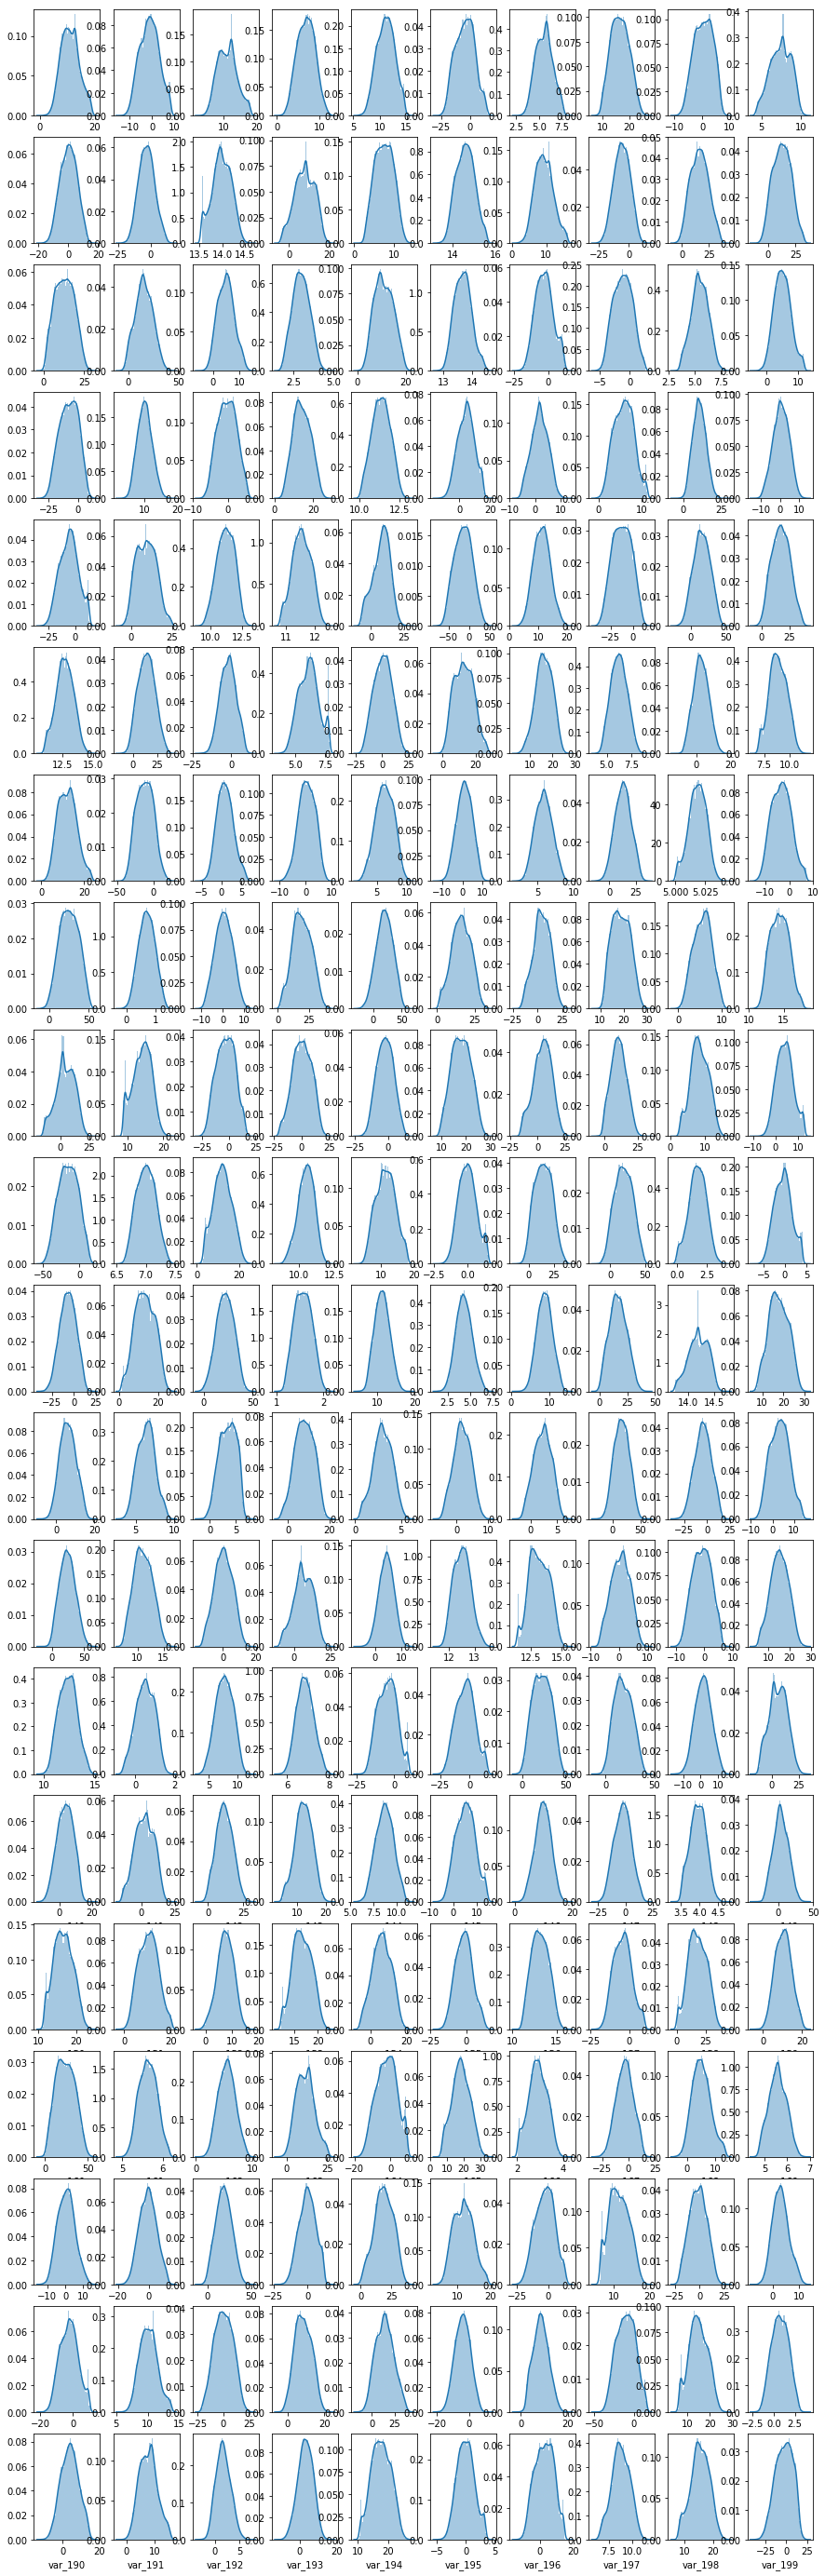

In [11]:
#타겟 1 값을 가진 Var1~Var199의 분포도 확인
fig, ax = plt.subplots(20, 10, sharex='col' , sharey='row')

for i in range(2,202):
    plt.subplot(20,10,i-1)
    sns.distplot(tran_pos[tran_pos.columns[i]])

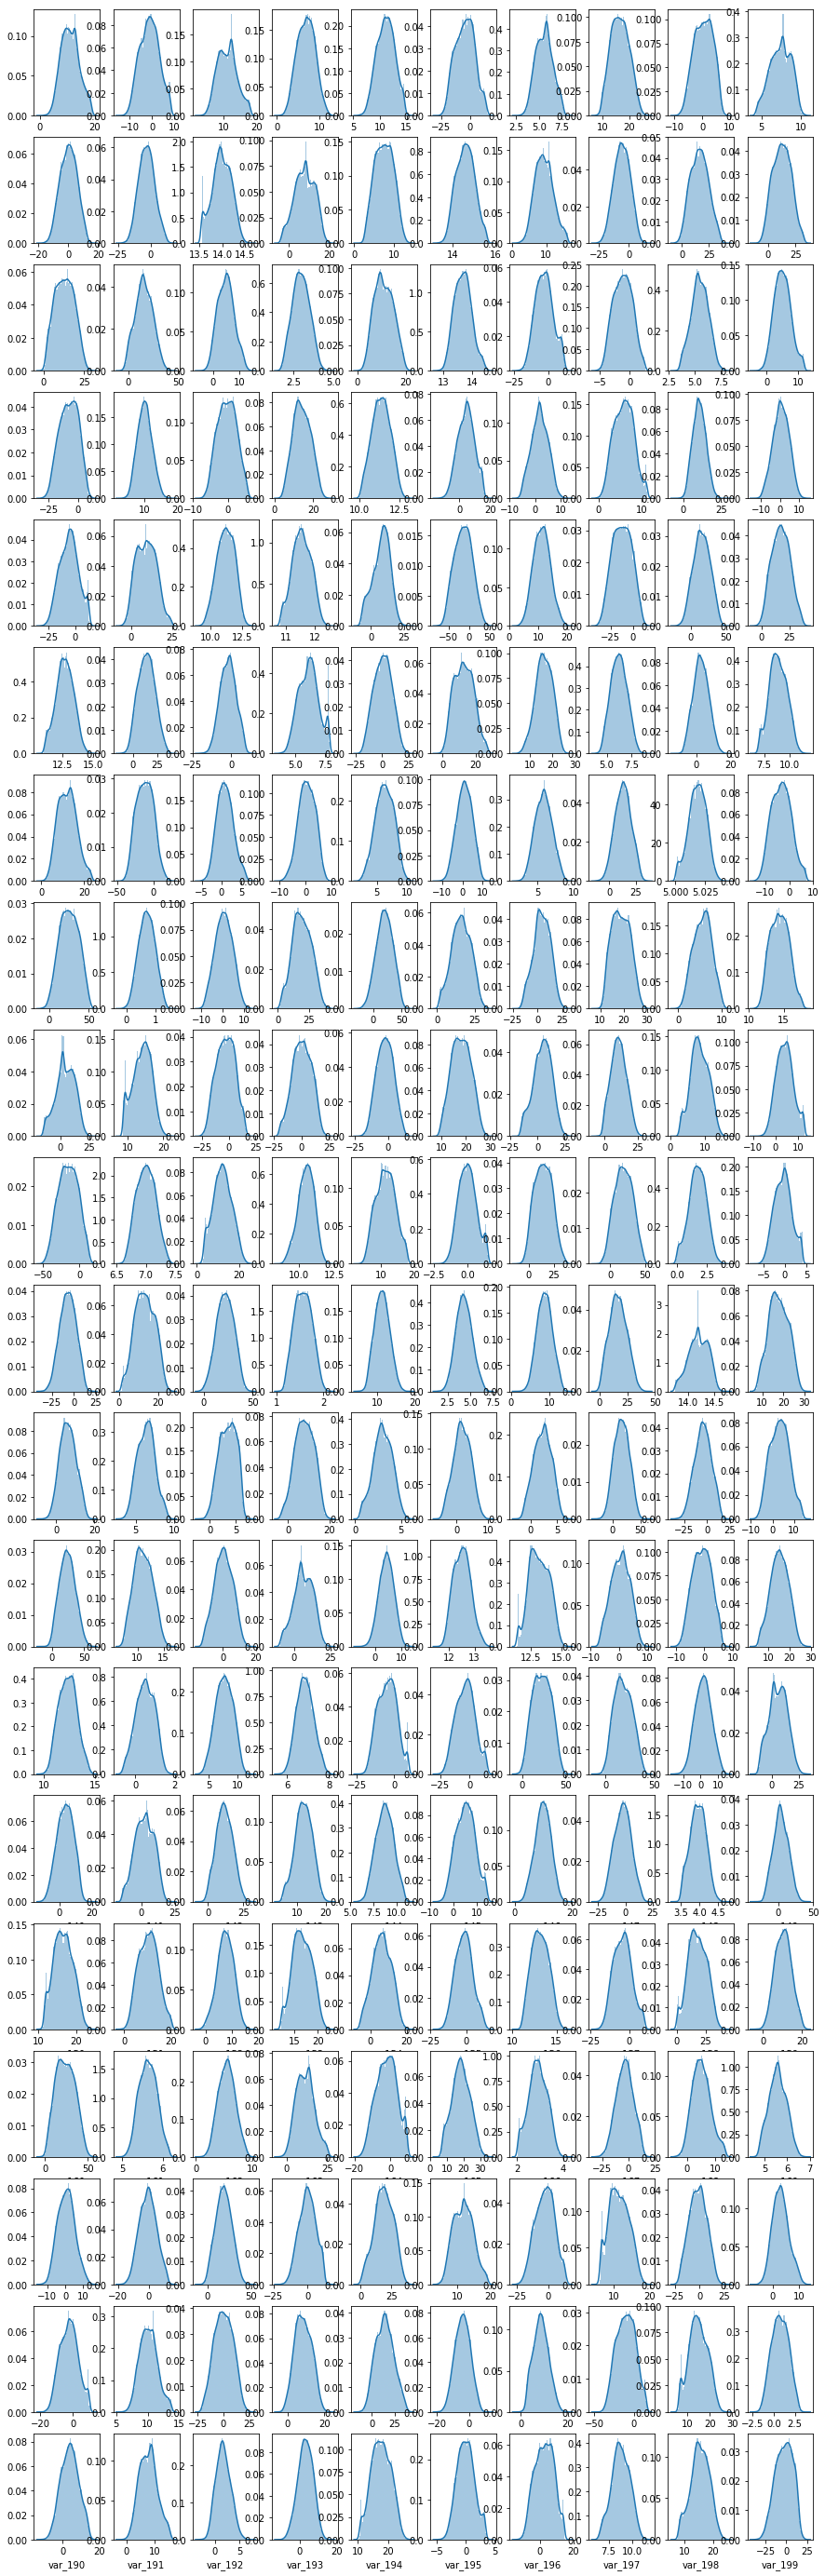

In [12]:
#타겟 0 값을 가진 Var1~Var199의 분포도 확인
fig, ax = plt.subplots(20, 10, sharex='col' , sharey='row')

for i in range(2,202):
    plt.subplot(20,10,i-1)
    sns.distplot(tran_pos[tran_neg.columns[i]])

In [13]:
#학습을 위한 표본데이터프레임 생성
tran_data = pd.concat([tran_pos,tran_neg], axis=0)

In [14]:
tran_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
66343,train_66343,1,6.2521,-5.4985,7.0529,10.9485,8.8225,-5.6348,5.4645,22.5231,...,1.8190,8.9306,1.4716,2.7131,19.4017,0.9905,9.2611,10.5832,16.6708,-19.1183
16780,train_16780,1,15.5485,1.2778,8.3932,4.8812,10.0209,-7.6518,6.2255,11.8471,...,5.7972,11.2387,-0.5149,4.2459,17.9431,0.5168,-3.2607,8.7088,14.7856,12.3964
134929,train_134929,1,12.8110,-1.7067,13.1644,8.1861,13.3932,-5.1901,4.8457,22.4472,...,2.3375,1.4896,2.6013,7.3096,17.4736,0.9639,-1.0094,8.2336,19.3272,2.5289
27170,train_27170,1,6.7799,-2.8062,12.5620,5.5222,7.7024,-1.2967,5.4067,14.0080,...,5.7655,5.8288,-0.3919,-0.8045,21.9750,-0.1515,3.4438,8.9871,16.9816,3.5149
148344,train_148344,1,8.4109,-7.7562,13.7418,5.2306,10.4956,-13.9082,5.0528,23.3343,...,11.7327,13.0335,3.1029,-1.5221,19.0387,-0.5673,0.7467,9.0292,21.2236,-13.3634


In [15]:
tran_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.500000,10.909826,-1.337629,10.906626,6.836561,11.104621,-4.744820,5.488444,16.523598,0.383194,...,3.568390,7.615487,1.839209,3.258883,17.913433,-0.091123,2.497488,8.869434,15.669116,-3.005514
std,0.500006,3.149146,4.125348,2.733560,2.062586,1.628110,8.014113,0.894521,3.412808,3.337370,...,4.692563,3.110981,1.484821,4.018115,3.164308,1.455607,5.500949,0.937942,3.124984,10.433673
min,0.000000,0.452800,-14.037000,2.615000,0.170700,5.876200,-29.484400,2.385700,7.022700,-9.839100,...,-11.906900,-2.343000,-3.814500,-11.783400,9.144600,-5.018500,-14.020400,5.960600,6.558700,-38.852800
25%,0.000000,8.576700,-4.493575,8.831525,5.289875,9.904600,-10.999600,4.822200,13.917750,-2.213800,...,0.111400,5.268400,0.790900,0.522650,15.543500,-1.140550,-1.742775,8.213100,13.583225,-10.870825
50%,0.500000,10.745050,-1.314250,10.789800,6.865450,11.128850,-4.457900,5.474850,16.437100,0.494200,...,3.555450,7.534100,1.789750,3.331650,17.881100,-0.127450,2.647000,8.852900,15.731600,-2.494950
75%,1.000000,13.050200,1.657450,12.718825,8.370475,12.294325,1.239675,6.100725,19.050300,3.016050,...,6.853975,9.709975,2.862500,6.156600,20.332250,0.894925,6.745825,9.572625,17.942150,5.212075
max,1.000000,19.458300,10.167100,18.294100,12.977300,15.788700,17.128100,8.355600,27.597700,9.627200,...,16.746100,16.520500,8.402400,17.150400,27.528400,4.088100,17.161400,11.953400,25.192500,27.534000


In [16]:
#샘플링 정확도를 높이기 위해 데이터 섞기
from sklearn.utils import shuffle
tran_data = shuffle(tran_data)

In [17]:
tran_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
84326,train_84326,0,10.9180,-6.4667,11.6012,6.4976,11.2511,-4.7874,7.0964,19.7583,...,5.9289,10.8806,1.2649,2.0115,17.5462,0.5235,4.3324,8.3849,12.8925,-3.2592
2387,train_2387,1,10.4920,3.6036,12.5010,8.9505,10.9050,-9.7892,5.9578,18.4825,...,5.4412,10.0860,1.8525,3.4434,20.7345,3.1748,1.9004,9.4803,11.6940,-10.8680
166979,train_166979,0,9.3159,-0.1971,11.8788,8.5037,14.2250,-6.3917,7.4335,12.2400,...,12.3649,7.2722,3.8138,7.6192,19.5300,0.7601,1.5633,7.6325,12.5235,-3.7274
135175,train_135175,0,11.7661,2.1044,9.0519,11.2746,12.1500,4.3752,4.3864,19.7872,...,0.2884,8.9984,3.8893,-1.0136,17.9520,-1.4547,1.4971,9.0361,16.2891,-14.4832
167213,train_167213,0,12.2171,0.5411,10.4306,10.0150,12.0455,-5.6475,5.7115,9.5793,...,13.5738,7.3165,1.6974,7.7519,19.7353,3.1035,-7.2764,8.6990,17.3563,-15.2688


In [18]:
#인덱스 초기화
tran_data.reset_index(drop=True, inplace=True)

In [19]:
tran_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_84326,0,10.9180,-6.4667,11.6012,6.4976,11.2511,-4.7874,7.0964,19.7583,...,5.9289,10.8806,1.2649,2.0115,17.5462,0.5235,4.3324,8.3849,12.8925,-3.2592
1,train_2387,1,10.4920,3.6036,12.5010,8.9505,10.9050,-9.7892,5.9578,18.4825,...,5.4412,10.0860,1.8525,3.4434,20.7345,3.1748,1.9004,9.4803,11.6940,-10.8680
2,train_166979,0,9.3159,-0.1971,11.8788,8.5037,14.2250,-6.3917,7.4335,12.2400,...,12.3649,7.2722,3.8138,7.6192,19.5300,0.7601,1.5633,7.6325,12.5235,-3.7274
3,train_135175,0,11.7661,2.1044,9.0519,11.2746,12.1500,4.3752,4.3864,19.7872,...,0.2884,8.9984,3.8893,-1.0136,17.9520,-1.4547,1.4971,9.0361,16.2891,-14.4832
4,train_167213,0,12.2171,0.5411,10.4306,10.0150,12.0455,-5.6475,5.7115,9.5793,...,13.5738,7.3165,1.6974,7.7519,19.7353,3.1035,-7.2764,8.6990,17.3563,-15.2688


In [20]:
#타겟값(y)과 데이터값(x)을 나누기 위해 데이터프레임 분리
targets = tran_data.iloc[:, 1:2]

In [21]:
targets.head()

,target
0,0
1,1
2,0
3,0
4,0


In [22]:
#Sklearn 사용을 위해 리스트 형태로 변환
target = targets['target'].tolist()

In [23]:
target[:10]

[0, 1, 0, 0, 0, 1, 0, 1, 0, 1]

In [24]:
datas = tran_data.iloc[:,2:]

In [25]:
datas.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,10.9180,-6.4667,11.6012,6.4976,11.2511,-4.7874,7.0964,19.7583,-1.8969,6.5984,...,5.9289,10.8806,1.2649,2.0115,17.5462,0.5235,4.3324,8.3849,12.8925,-3.2592
1,10.4920,3.6036,12.5010,8.9505,10.9050,-9.7892,5.9578,18.4825,0.0561,5.9393,...,5.4412,10.0860,1.8525,3.4434,20.7345,3.1748,1.9004,9.4803,11.6940,-10.8680
2,9.3159,-0.1971,11.8788,8.5037,14.2250,-6.3917,7.4335,12.2400,3.3309,8.2628,...,12.3649,7.2722,3.8138,7.6192,19.5300,0.7601,1.5633,7.6325,12.5235,-3.7274
3,11.7661,2.1044,9.0519,11.2746,12.1500,4.3752,4.3864,19.7872,-4.1599,8.6387,...,0.2884,8.9984,3.8893,-1.0136,17.9520,-1.4547,1.4971,9.0361,16.2891,-14.4832
4,12.2171,0.5411,10.4306,10.0150,12.0455,-5.6475,5.7115,9.5793,7.2153,6.8018,...,13.5738,7.3165,1.6974,7.7519,19.7353,3.1035,-7.2764,8.6990,17.3563,-15.2688


In [26]:
#datas의 전체 row 내용을 리스트로 변환
data = datas.values.tolist()

In [27]:
data[0]

[10.918,
 -6.4667,
 11.6012,
 6.4976,
 11.2511,
 -4.7874,
 7.0964,
 19.7583,
 -1.8969,
 6.5984,
 6.5291,
 -9.2037,
 14.1835,
 9.5041,
 5.5673,
 14.2388,
 15.4929,
 3.0569,
 21.4159,
 -0.0491,
 18.5565,
 32.156,
 1.7964,
 3.6819,
 12.9974,
 13.3996,
 -5.4293,
 0.0651,
 5.1518,
 5.3192,
 -5.9051,
 6.0241,
 -1.2994,
 12.7433,
 12.5439,
 14.8881,
 2.7186,
 8.5748,
 5.8691,
 -0.0833,
 -17.8238,
 14.3807,
 11.5085,
 11.8179,
 9.0993,
 -39.0834,
 15.8532,
 -27.0125,
 9.9831,
 9.5387,
 12.8743,
 16.8825,
 4.4153,
 5.4904,
 -4.4923,
 12.7318,
 16.1994,
 7.4375,
 1.1076,
 7.1492,
 17.1832,
 -23.8233,
 2.1413,
 -2.6858,
 5.2123,
 0.4363,
 5.3519,
 5.2839,
 5.0139,
 4.9843,
 44.2915,
 0.5382,
 2.3351,
 24.9277,
 -5.1026,
 18.5802,
 1.5025,
 22.8649,
 4.1209,
 14.4402,
 3.4729,
 18.2103,
 -5.2216,
 3.9902,
 -8.0108,
 21.3785,
 4.3446,
 5.0387,
 11.3137,
 3.2498,
 -6.7876,
 6.9687,
 9.2629,
 10.9408,
 7.9239,
 -0.8164,
 8.9417,
 22.0401,
 2.1504,
 1.5634,
 -15.4925,
 5.9012,
 26.8177,
 1.6345,
 12.2

### 학습데이터와 테스트데이터 분리

In [28]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=42)

In [29]:
from collections import Counter

In [31]:
#원본데이터와 학습데이터의 비중 확인
print('원본 데이터의 비율:', Counter(target))
print('학습 데이터의 비율:', Counter(train_y))
print('원본 데이터의 비율:', Counter(test_y))

원본 데이터의 비율: Counter({0: 20000, 1: 20000})
학습 데이터의 비율: Counter({1: 14019, 0: 13981})
원본 데이터의 비율: Counter({0: 6019, 1: 5981})


In [32]:
#스케일링
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

scaler = scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

#테스트셋도 스케일링
scaled_test_x = scaler.transform(test_x)

### Gaussian Naive Bayse

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [35]:
gnb_model = gnb.fit(scaled_train_x,train_y)

In [36]:
pred = gnb_model.predict(scaled_test_x)
print("Accuracy : ", (pred == test_y).sum() / len(test_x))

Accuracy :  0.8043333333333333
